![](img/Credit-Card-Fraud.jpg "Credit card Fraud")

# Introduction

With a further developments of the internet and advancments in social and web hacking everyday clients of banking services worldwide face a risk of having their credit card information stolen and used in unathorized ways. That's why it is important for banks to not only invests in cybersecurity of their system, but also the fradulent transaction detection system as the client may of accidentally leaked their credit card information. 

## Main Goal:

The following paper will focus on the fradulent transactions and attempt to identify them using Unsupervised Machine Learning techniques in association with Supervised Machine Learning ones. 

The goal is not to increase the fradulent detection directly, but to analyze the potential improvements to the Supervised ML models that Unsupervised clusters will give. 

The roadmap of the analysis is presented below: 

![](img/roadmap.png "Roadmap")

## Information on the dataset:

>The dataset contains transactions made by credit cards in September 2013 by European cardholders. 

>This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In the following paper the assumption is that the scaling has been already applied on the data and we would not need to perform such an action. Additionally, normalization will not be performed on the skewed data, due to the previos assumption. 

**Source:**
[Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)


# EDA (exploratory data analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style(style='darkgrid')

In [2]:
credit_card_df = pd.read_csv('creditcard.csv')

First and foremost we would like to see the structure of the Dataset
* What are the columns? 
* How does the data looks like? 
* What is the shape?
* How does our target column looks like?

In [3]:
credit_card_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_df.shape

(284807, 31)

It is visible from the shape that the dataset contains very large number of data and can be classified as Big Data. 

In [5]:
credit_card_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

The present values are either `float` or `int` which simplifies the preprocessing as there is no need to `OneHotEncoder` the data for the algorith to function. Additionally, based on our dataset information it is visible that feature `Time` is not chronological or categorical, it just records the transaction's number of seconds. 

In [6]:
print('Number of null values:', credit_card_df.isna().sum().sum())
print('-'*50)
display(credit_card_df.info())

Number of null values: 0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float

None

In [7]:
credit_card_df.min()

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

We can see that the dataset does not have any null values.

`Amount` and `Time` are also non negative values which simplifies the task as there have not been any erors in the records.

Perfect! It is seen that the dataset is perfectly preprocessed prior to the publication on the web and there have not been any mistakes made on it.

In [8]:
print('-'*50)
print('Full DataFrame information:')
display(credit_card_df[['Amount', 'Time']].describe())
print('-'*50)
print('Information on all fraud transactions:')
display(credit_card_df[credit_card_df['Class'] == 1][['Amount', 'Time']].describe())

--------------------------------------------------
Full DataFrame information:


,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


--------------------------------------------------
Information on all fraud transactions:


,Amount,Time
count,492.000000,492.000000
mean,122.211321,80746.806911
std,256.683288,47835.365138
min,0.000000,406.000000
25%,1.000000,41241.500000
50%,9.250000,75568.500000
75%,105.890000,128483.000000
max,2125.870000,170348.000000


In [9]:
y = credit_card_df['Class']
X = credit_card_df.drop(y.name, axis=1)

In [10]:
print('Distribution of the dataset:')
display(y.value_counts())
print('-'*50)
print('Percent distribution of the dataset:')
y.value_counts(normalize=True)

Distribution of the dataset:


0    284315
1       492
Name: Class, dtype: int64

--------------------------------------------------
Percent distribution of the dataset:


0    0.998273
1    0.001727
Name: Class, dtype: float64

[{<ufunc 'sqrt'>: 2.8222631528102635}, {<ufunc 'cbrt'>: 1.495629316102277}, {<ufunc 'log1p'>: 0.1627029277416401}]


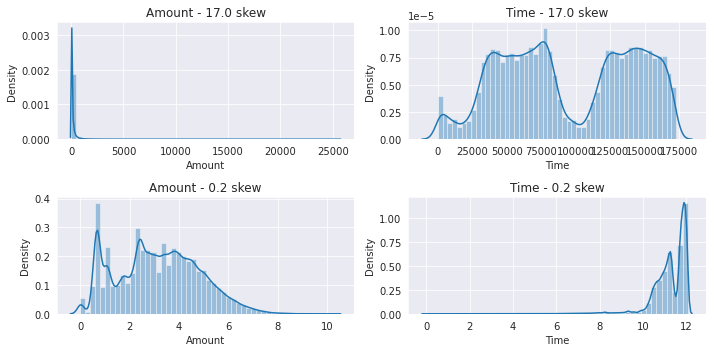

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=[10, 5])

chosen_columns = ['Amount', 'Time']

def plot_skew(X, columns, ax):
    for i, column in enumerate(columns):
        sns.distplot(X[column], ax=ax[i])\
            .set_title('{} - {:.1f} skew'.format(column, X['Amount'].skew()))


plot_skew(X, chosen_columns, ax1)

skews = [{trans: X['Amount'].apply(trans).skew()} for trans in [np.sqrt, np.cbrt, np.log1p]]
print(skews)

X_trans = X.copy()
X_trans[chosen_columns] = X_trans[chosen_columns].apply(np.log1p)

plot_skew(X_trans, chosen_columns, ax2)
plt.tight_layout()
plt.show()

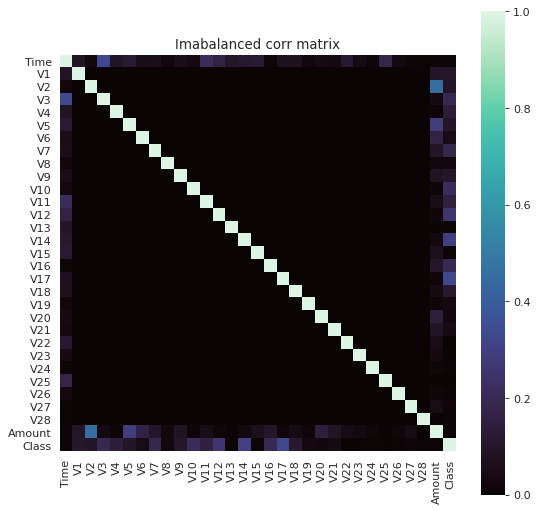

In [12]:
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(pd.concat([X_trans, y], axis=1).corr().abs(), square=True, cmap='mako').set_title('Imabalanced corr matrix')
plt.show()

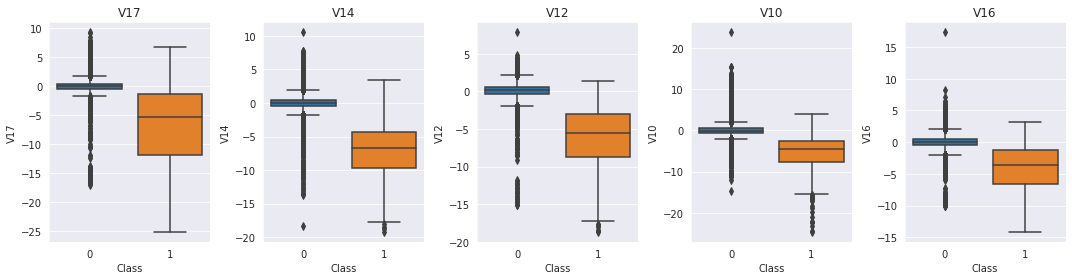

In [13]:
def corr_plot(df):
    corr_columns = [
        df.corr().abs()['Class'].sort_values(ascending=False).index[i] 
        for i in range(1, 6)]

    fig, ax = plt.subplots(ncols=len(corr_columns), figsize=[15, 4])

    [sns.boxplot(x='Class', y=column, data=df, ax=ax).set_title(column) for column, ax in zip(corr_columns, ax)]
    plt.tight_layout()
    plt.show()

corr_plot(credit_card_df)

In [14]:
from imblearn.under_sampling import RandomUnderSampler

minority_class_ratio = 0.10
majority_class = int(492/minority_class_ratio-492)
sampling_ratio = {0: majority_class, 1: 492}
X_resample_under, y_resample_under = RandomUnderSampler(sampling_strategy=sampling_ratio).fit_resample(X_trans, y)

In [15]:
print('Original shape of the DataFrame:', credit_card_df.drop('Class', axis=1).shape)
print('-'*50)
print('New shape of the DataFrame:', X_resample_under.shape)
print('-'*50)
print('Distribution of a new target class:')
display(y_resample_under.value_counts())

Original shape of the DataFrame: (284807, 30)
--------------------------------------------------
New shape of the DataFrame: (4920, 30)
--------------------------------------------------
Distribution of a new target class:


0    4428
1     492
Name: Class, dtype: int64

In [16]:
resampled_under_df = pd.concat([X_resample_under, y_resample_under], axis=1)

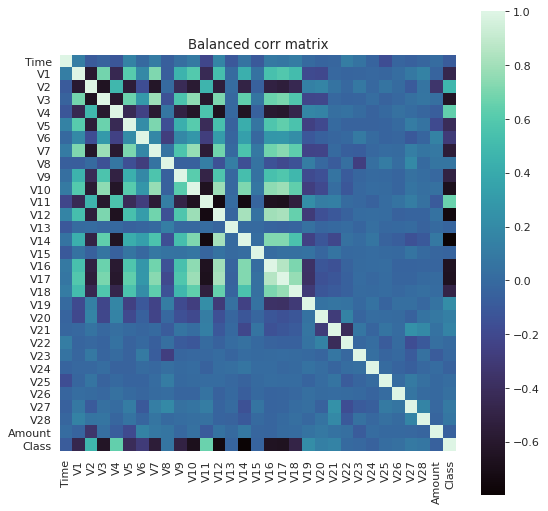

In [17]:
plt.figure(figsize=[8, 8], dpi=80)
sns.heatmap(resampled_under_df.corr(), square=True, cmap='mako').set_title('Balanced corr matrix')
plt.show()

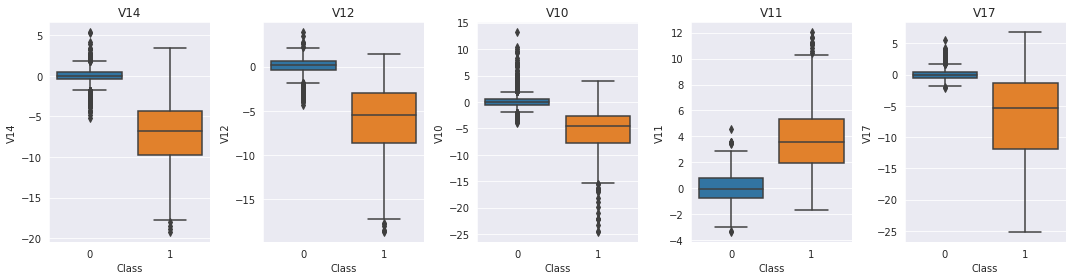

In [18]:
corr_plot(resampled_under_df)

In [19]:
from sklearn.preprocessing import RobustScaler
scale_columns = ['Amount', 'Time']
scaler = RobustScaler()
scaler.fit(X_resample_under[scale_columns])

def apply_scaler(df):
    global scaler
    scale_columns = ['Amount', 'Time']
    df[scale_columns] = scaler.transform(df[scale_columns])
    return df

X_resample_under_scaled = apply_scaler(X_resample_under)


In [20]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_jobs=-1).fit_transform(X_resample_under_scaled)
X_tsne = pd.DataFrame(X_tsne, columns = ['TSNE1', 'TSNE2'])

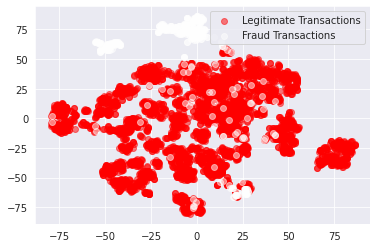

In [21]:
tsne_df = pd.concat([pd.DataFrame(X_tsne), y_resample_under], axis=1)
def tsne_plot(tsne_df, ax):
    legit = tsne_df[tsne_df['Class'] == 0]
    ax.scatter(legit['TSNE1'], legit['TSNE2'], label='Legitimate Transactions', alpha=0.5, c='red')
    fraud = tsne_df[tsne_df['Class'] == 1]
    ax.scatter(fraud['TSNE1'], fraud['TSNE2'], label='Fraud Transactions', alpha=0.5, c='white')
    plt.legend()
    plt.show()
    
tsne_plot(tsne_df, plt)

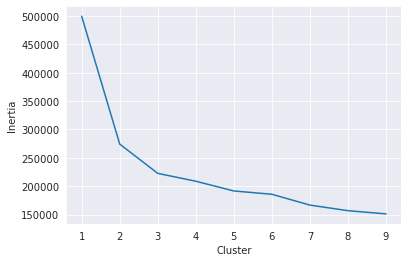

In [22]:
from sklearn.cluster import KMeans

inertia = []
clusters = range(1, 10)
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_jobs=-1, random_state=42)
    kmeans.fit(X_resample_under_scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(clusters, inertia)
plt.xlabel('Cluster'), plt.ylabel('Inertia')
plt.show()

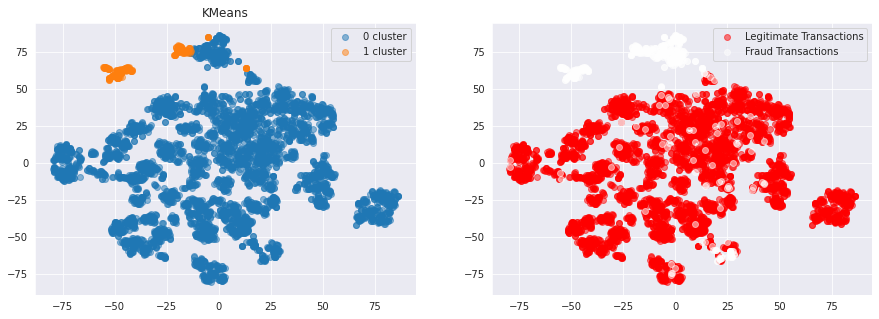

In [23]:
fig, ax = plt.subplots(1, 2, figsize=[15, 5])

"""----------------Kmeans----------------"""
kmeans = KMeans(n_clusters=2, n_jobs=-1, random_state=42)
kmeans.fit(X_resample_under_scaled)
ax[0].set_title('KMeans')
tsne_df['KMeans'] = kmeans.labels_
for cluster in range(kmeans.labels_.min(), kmeans.labels_.max()+1):
    legit = tsne_df[tsne_df['KMeans'] == cluster]
    ax[0].scatter(legit['TSNE1'], legit['TSNE2'], label='{} cluster'.format(cluster), alpha=0.5)
ax[0].legend()

"""----------------Actual----------------"""
tsne_plot(tsne_df, ax[1])

plt.show()

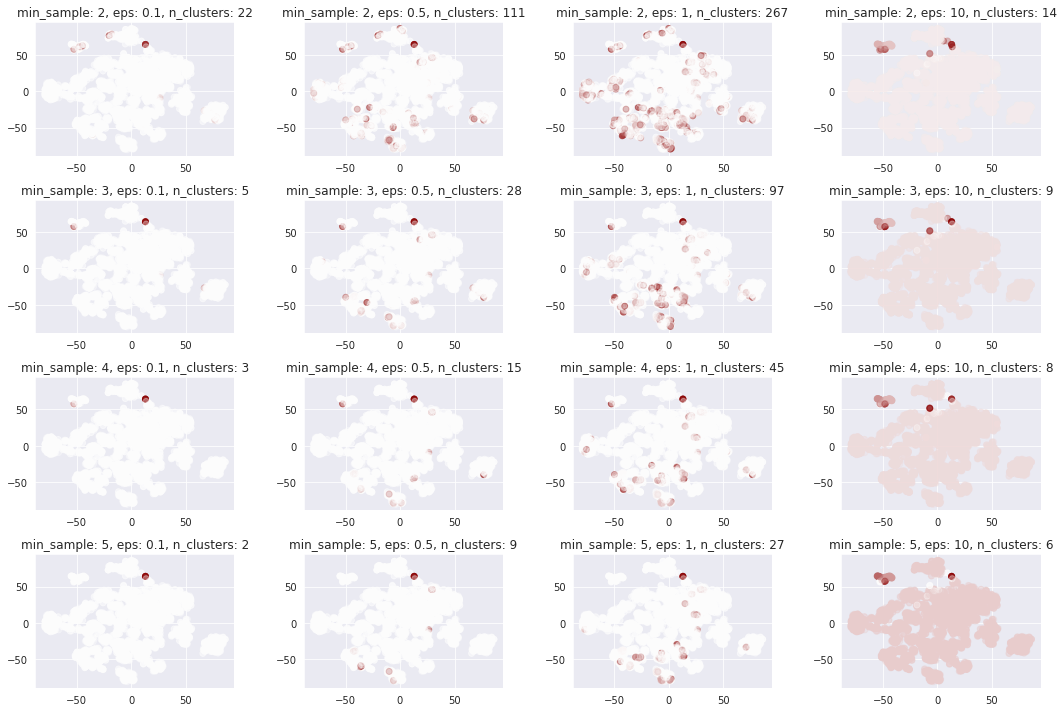

In [24]:
from sklearn.cluster import DBSCAN
import matplotlib as mpl

cmap = mpl.colors.LinearSegmentedColormap.from_list('white_to_red', ['white', 'darkred'])

epss = [0.1, 0.5, 1, 10]
min_samples = [2, 3, 4, 5]

fig, ax = plt.subplots(4, 4, figsize=[15, 10])

for row, min_sample in enumerate(min_samples):
    for column, eps in enumerate(epss):
        dbs = DBSCAN(n_jobs=-1, eps=eps, min_samples=min_sample)
        dbs.fit(X_resample_under_scaled)
        predicted_cluster = dbs.labels_
        palette = sns.color_palette("flare", as_cmap=True, n_colors=len(np.unique(dbs.labels_)))
        ax[row, column].set_title('min_sample: {}, eps: {}, n_clusters: {}'.format(min_sample, eps, len(np.unique(dbs.labels_))))
        ax[row, column].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=predicted_cluster, cmap=cmap, alpha=0.3)

plt.tight_layout()
plt.show()

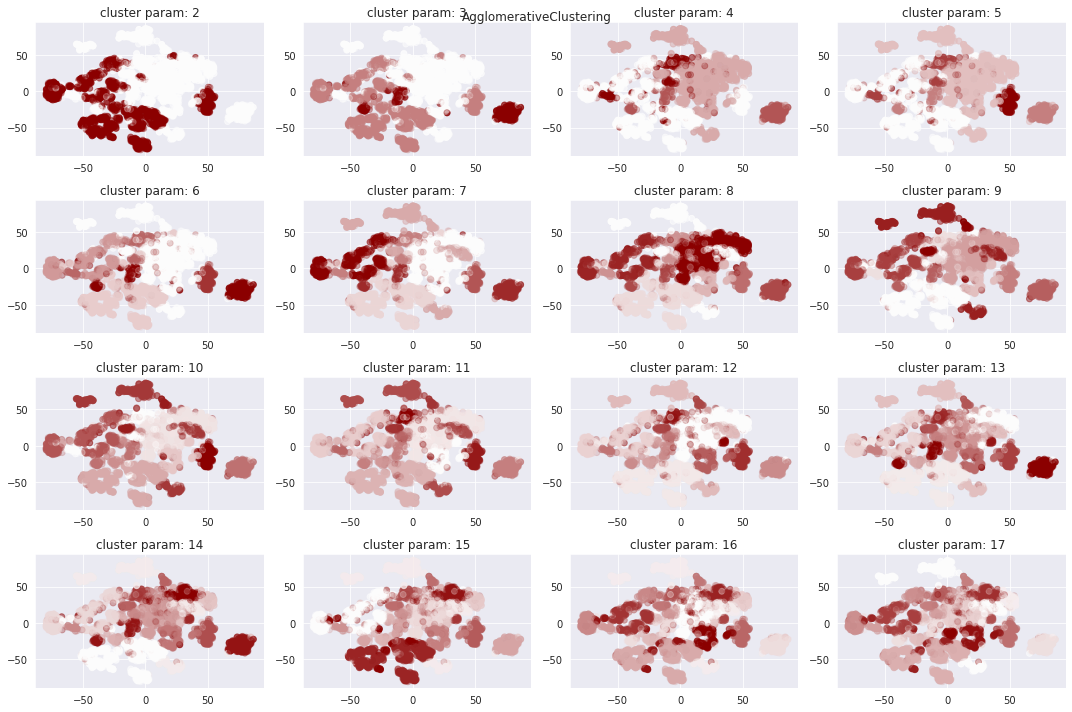

In [25]:
from sklearn.cluster import AgglomerativeClustering

fig, ax = plt.subplots(4, 4, figsize=[15, 10])
plt.suptitle('AgglomerativeClustering')
cluster = 2
for row in range(4):
    for column in range(4):
        agglo = AgglomerativeClustering(n_clusters=cluster, affinity='cosine', linkage='average')
        predicted_cluster = agglo.fit_predict(X_resample_under_scaled)
        palette = sns.color_palette("flare", as_cmap=True, n_colors=len(np.unique(dbs.labels_)))
        ax[row, column].set_title('cluster param: {}'.format(cluster))
        ax[row, column].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=predicted_cluster, cmap=cmap, alpha=0.3)
        cluster+=1

plt.tight_layout()
plt.show()

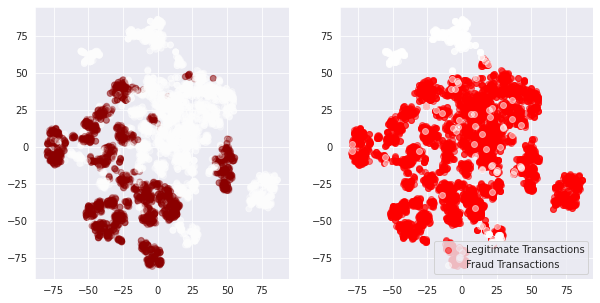

In [26]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])

"""---AgglomerativeClustering----"""
agglo = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
y_pred_algo = agglo.fit_predict(X_resample_under_scaled)
ax[0].scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=y_pred_algo, cmap=cmap, alpha=0.3)

"""---Actual---"""
tsne_plot(tsne_df, ax[1])

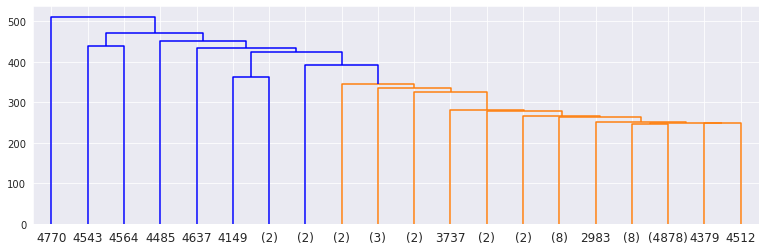

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage

fig, ax = plt.subplots(figsize=(13, 4))
Z = linkage(agglo.children_)
dendrogram(
    Z, 
    orientation='top', 
    p=20, 
    truncate_mode='lastp', 
    show_leaf_counts=True, 
    ax=ax, 
    above_threshold_color='blue')
plt.show()

In [28]:
X_val_scaled = apply_scaler(X)
y_val = y.copy()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score
from sklearn.metrics import f1_score, precision_recall_curve, plot_precision_recall_curve

def model_constructor(model, params, X_train, y_train, X_val, y_val):
    gs = GridSearchCV(model, param_grid=params, cv=5, n_jobs=-1)
    gs.fit(X_train, y_train)
    print('Best default score: ', gs.best_score_)
    print('-'*50)
    print('Best params: ', gs.best_params_)
    print('-'*50)
    y_pred = gs.predict(X_val)
    print('F1 score of minority target: ', f1_score(y_val, y_pred, average=None)[1])
    print('-'*50)
    print(classification_report(y_val, y_pred))
    print('-'*50)
    
    fig, ax = plt.subplots(1, 2, figsize=[12, 5])
    sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues', fmt='g', ax=ax[0])
    average_precision = average_precision_score(y_val, y_pred)
    pprc = plot_precision_recall_curve(gs, X_val, y_val, ax=ax[1])
    pprc.ax_.set_title('Precision-Recall curve')
    plt.show()
    
    return gs

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
params={
    'n_estimators': [100, 200, 400],
    'max_depth': [100, 200]
}

Results for not using any clustering method:
--------------------------------------------------
Best default score:  0.984959349593496
--------------------------------------------------
Best params:  {'max_depth': 200, 'n_estimators': 200}
--------------------------------------------------
F1 score of minority target:  0.7410296411856474
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.60      0.97      0.74       492

    accuracy                           1.00    284807
   macro avg       0.80      0.98      0.87    284807
weighted avg       1.00      1.00      1.00    284807

--------------------------------------------------


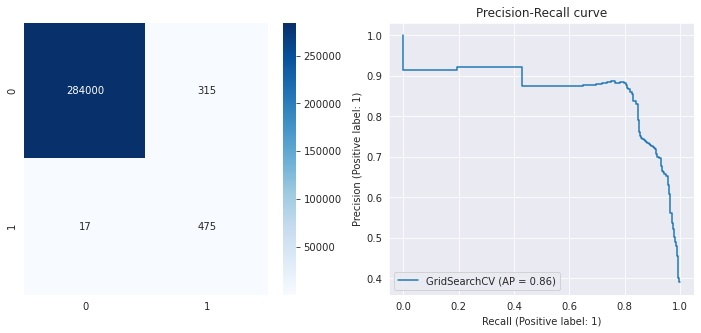

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100, 200],
                         'n_estimators': [100, 200, 400]})

In [31]:
# Result of not using any clustering method sa a feature
print('Results for not using any clustering method:')
print('-'*50)
model_constructor(forest, params, X_resample_under_scaled, y_resample_under, X_val_scaled, y_val)

Results for KMeans Clustering:
--------------------------------------------------
Best default score:  0.9794715447154472
--------------------------------------------------
Best params:  {'max_depth': 100, 'n_estimators': 400}
--------------------------------------------------
F1 score of minority target:  0.49645390070921985
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.82      0.36      0.50       492

    accuracy                           1.00    284807
   macro avg       0.91      0.68      0.75    284807
weighted avg       1.00      1.00      1.00    284807

--------------------------------------------------


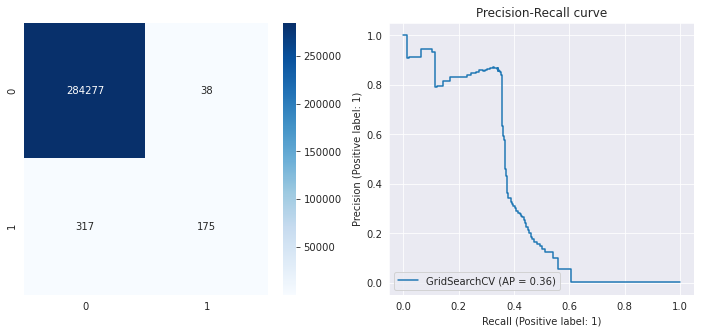

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100, 200],
                         'n_estimators': [100, 200, 400]})

In [32]:
# Result of using KMeans clustering as a feature
print('Results for KMeans Clustering:')
print('-'*50)
y_kmeans_train = kmeans.labels_
model_constructor(forest, params, X_resample_under_scaled, y_kmeans_train, X_val_scaled, y_val)

Results for AgglomerativeClustering:
--------------------------------------------------
Best default score:  0.9638211382113822
--------------------------------------------------
Best params:  {'max_depth': 200, 'n_estimators': 400}
--------------------------------------------------
F1 score of minority target:  0.00018826777953843016
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    284315
           1       0.00      0.02      0.00       492

    accuracy                           0.55    284807
   macro avg       0.50      0.29      0.36    284807
weighted avg       1.00      0.55      0.71    284807

--------------------------------------------------


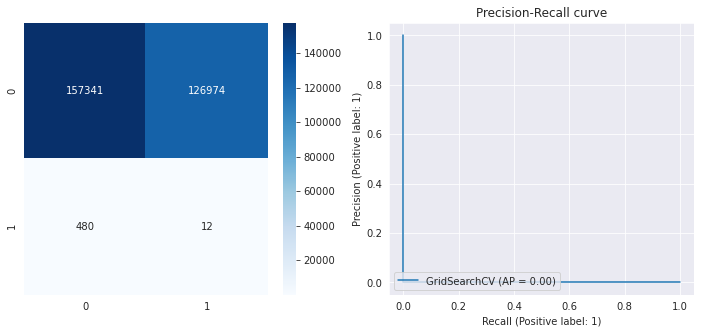

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [100, 200],
                         'n_estimators': [100, 200, 400]})

In [33]:
# Result of using AgglomerativeClustering as a feature
print('Results for AgglomerativeClustering:')
print('-'*50)
model_constructor(forest, params, X_resample_under_scaled, y_pred_algo, X_val_scaled, y_val)

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split


class SupervisedUnsupervisedMix:
    def __init__(self, X, y, n_clusters, clustering_model, supervised_model):
        self.X = X
        self.y = y
        self.n_clusters = n_clusters
        self.clustering_model = clustering_model
        if self.clustering_model:
            self.clustering_model = clustering_model.set_params(**{'n_clusters': self.n_clusters})
        self.supervised_model = supervised_model
        self.clustering_df = self.X.copy()
        self.f1_list = None
    
    def clustering_column(self):
        """Adding clustering column to the origin DataFrame to analyze the potential improvements from it"""
        km_col = pd.Series(self.clustering_model.fit_predict(self.X))
        km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
        self.clustering_df = pd.concat([self.clustering_df, km_cols], axis=1)

    def avg_f1(self, number_of_splits):
        f1_list = []
        for i_train, i_test in StratifiedShuffleSplit(n_splits=number_of_splits).split(self.clustering_df, self.y):
            X_train, X_test = self.clustering_df.iloc[i_train], self.clustering_df.iloc[i_test]
            y_train, y_test = self.y.iloc[i_train], self.y.iloc[i_test]
            self.supervised_model.fit(X_train, y_train)
            y_pred = self.supervised_model.predict(X_test)
            f1_list.append(f1_score(y_test, y_pred, average=None)[1])
            
            
        return np.average(f1_list)
    
    def f1_list_constructer(self, number_of_splits):
        self.f1_list = [self.avg_f1(number_of_splits) for _ in range(2, self.n_clusters)]

    def plot_metrics(self):
        fig, ax = plt.subplots(1, 2, figsize=[10, 5])
        
        ax[0].plot(np.arange(2, self.n_clusters), self.f1_list)
        ax[0].set_title('Cluster+Supervised')
        ax[0].set_xlabel('Number of clusters as features')
        ax[0].set_ylabel('Average F1 score of minority class over 10 iterations')
        
        X_train, X_test, y_train, y_test = train_test_split(self.clustering_df, self.y)
        self.supervised_model.fit(X_train, y_train)
        pprc = plot_precision_recall_curve(self.supervised_model, X_test, y_test, ax=ax[1])
        pprc.ax_.set_title('Precision-Recall curve')
        plt.tight_layout()
        plt.show()

In [35]:
forest = RandomForestClassifier().set_params(**{'max_depth': 100, 'n_estimators': 200})
model = SupervisedUnsupervisedMix(X_resample_under_scaled, y_resample_under, None, None, forest)
average_f1 = model.avg_f1(5)
print('The F1 score for the minority is: {:.2f}'.format(average_f1))

The F1 score for the minority is: 0.92


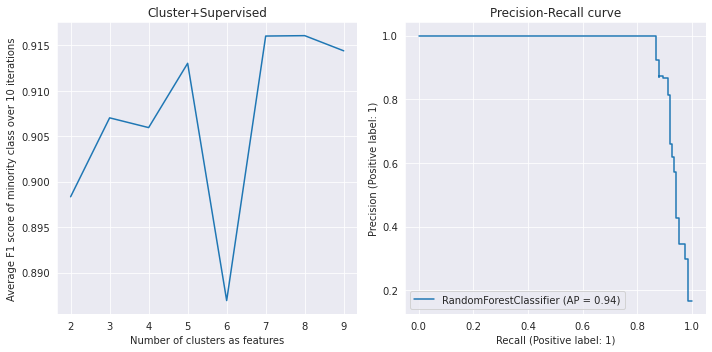

In [36]:
# KMeans 
kmeans = KMeans()
forest = RandomForestClassifier().set_params(**{'max_depth': 100, 'n_estimators': 200})
model = SupervisedUnsupervisedMix(X_resample_under_scaled, y_resample_under, 10, kmeans, forest)
model.clustering_column()
model.f1_list_constructer(5)
model.plot_metrics()

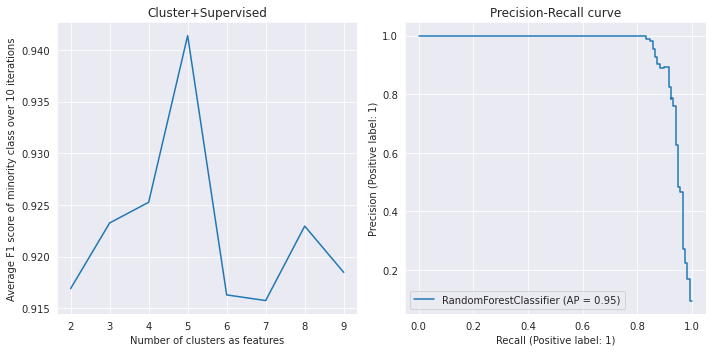

In [37]:
# AgglomerativeClustering 
agglo = AgglomerativeClustering().set_params(**{'affinity': 'cosine', 'linkage': 'average'})
forest = RandomForestClassifier().set_params(**{'max_depth': 100, 'n_estimators': 200})
model = SupervisedUnsupervisedMix(X_resample_under_scaled, y_resample_under, 10, agglo, forest)
model.clustering_column()
model.f1_list_constructer(5)
model.plot_metrics()